Populating the interactive namespace from numpy and matplotlib
6.67408e-11 5060.99225165


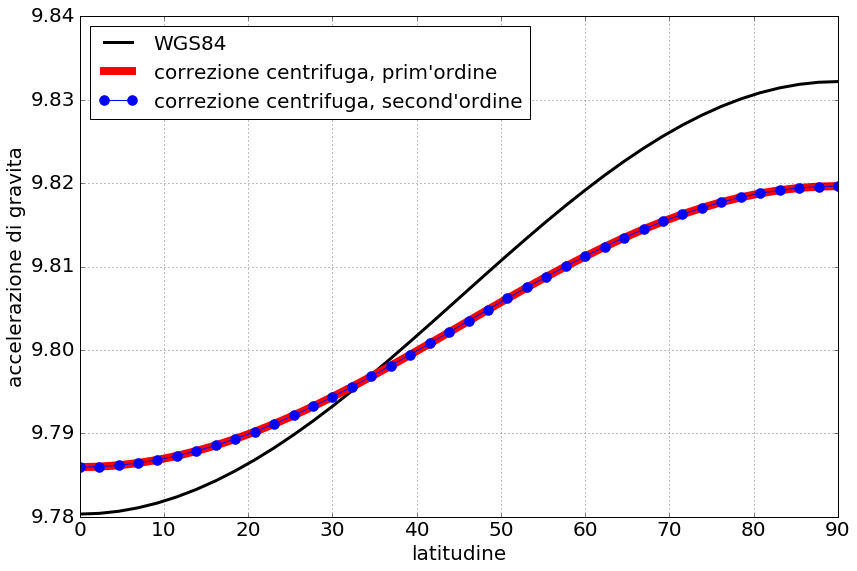

In [2]:
%pylab inline

from scipy.constants import G      # costante di gravitazione universale

# raggio medio, massa e velocità angolare della Terra
R=6371000; M=5.972e24; omega=2*pi/(24*3600)
  
# raggio polare ed equatoriale della Terra (semiassi minore e maggiore) WGS84
a=6378137.; b=6356752.

# accelerazione di gravità se la Terra fosse sferica e in quiete
g0=G*M/R**2

def g(lat):                        # "international gravity formula" WGS84
   g0 = 9.7803267714               # http://en.wikipedia.org/wiki/Theoretical_gravity
   a  = 0.00193185138639           # tiene conto del contributo centrifugo e del fatto che la
   b  = 0.00669437999013           # forma della Terra (geoide) può essere ben approssimata
   s  = sin(lat*pi/180.)           # mediante un ellissoide di rotazione
   return g0*(1+a*s**2)/sqrt(1-b*s**2)

def g1(lat):                       # contributo centrifugo, prim'ordine in omega**2*R/g0
   return g0-omega**2*R*cos(lat*pi/180.)**2

def g2(lat):                       # contributo centrifugo, second'ordine in omega**2*R/g0
   L=lat*pi/180.
   return sqrt((-g0+omega**2*R*cos(L)**2)**2 +(omega**2*R*cos(L)*sin(L))**2)

lat=linspace(0,90,40)
fig=figure(figsize=(12,8))
ax=fig.add_subplot(111)
fs=20
ax.tick_params(labelsize=fs)
plot(lat,g(lat),'k',label='WGS84',linewidth=3)
plot(lat,g1(lat),'r',label="correzione centrifuga, prim'ordine",linewidth=8)
plot(lat,g2(lat),'b.-',label="correzione centrifuga, second'ordine",markersize=20)
grid(); legend(loc='best',fontsize=fs)
xlabel('latitudine',fontsize=fs)
ylabel("accelerazione di gravita",fontsize=fs)
fig.tight_layout()